Guiding questions<br>
What are some trends in smart device usage?<br>
How could these trends apply to Bellabeat customers?<br>
How could these trends help influence Bellabeat marketing strategy?

Business Task:-<br>
Analyze FitBit fitness tracker data to gain insights into how consumers are using the FitBit app and discover trends for Bellabeat marketing strategy.

 Business Objectives:<br>
What are the trends identified?<br>
How could these trends apply to Bellabeat customers?<br>
How could these trends help influence Bellabeat marketing strategy?

Let's start our analysis with the daily activities file.

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
daily_df = pd.read_csv(r"C:\Users\Prakhar Shukla\Desktop\Case Study - 2\Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv");

In [3]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
daily_df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [5]:
daily_df.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Here we can see that there are no null values in this data.

Now let's check if the data for 30 IDs is present or not.

In [6]:
pd.unique(daily_df["Id"])

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

The above array contains all the unique IDs. Now let's check the lenght of this array.

In [7]:
len(pd.unique(daily_df["Id"]))

33

Here we can see that from a survey of 30 people we recieved 33 responses, that means some people have more than one account. We can not remove the access IDs as we are not how that may affect the data.

Now let's check the data types of columns.

In [8]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [9]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


On checking the data, we can see that the ActivityDate is of 'object' type, so we need to change it to DateTime format and set the format to yyyy-mm-dd

In [10]:
daily_df["ActivityDate"] = pd.to_datetime(daily_df["ActivityDate"], format = "%m/%d/%Y")

In [11]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [12]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

After observing the info of the data, we can see that we can create a few more columns for better analusis such as :-

1. Total_Min = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes
2. Day_of_Week = By seperating the Day from the ActivityDate for Weekly Analysis.

In [13]:
daily_df["Total_Min"] = daily_df["VeryActiveMinutes"] + daily_df["FairlyActiveMinutes"] + daily_df["LightlyActiveMinutes"] + daily_df["SedentaryMinutes"] 

In [14]:
daily_df["Total_Min"]

0      1094
1      1033
2      1440
3       998
4      1040
       ... 
935    1440
936    1440
937    1440
938    1440
939     931
Name: Total_Min, Length: 940, dtype: int64

In [15]:
daily_df["Day_of_Week"] = daily_df["ActivityDate"].dt.day_name()

Now let's also make a column for total hours of activity.

In [16]:
daily_df["Total_Hours"] = round(daily_df["Total_Min"]/60,2)

Now let's take a look at all the columns of the data.

In [17]:
daily_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'Total_Min',
       'Day_of_Week', 'Total_Hours'],
      dtype='object')

Now let's rearrange and rename some of these columns.

In [18]:
daily_df.rename(columns = {"ActivityDate":"Date"},inplace=True)
cols = ['Id','Date','TotalSteps', 'TotalDistance', 'Calories',
       'Day_of_Week', 'Total_Min', 'Total_Hours', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes']

Above list is the list of the rearranged and renamed columns, now let's make a data frame based on this columns.

In [19]:
daily_df = daily_df[cols]

Now that the transformation of data is completed, let's take a look at the data.

In [20]:
daily_df.head()

,Id,Date,TotalSteps,TotalDistance,Calories,Day_of_Week,Total_Min,Total_Hours,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,2016-04-12,13162,8.50,1985,Tuesday,1094,18.23,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728
1,1503960366,2016-04-13,10735,6.97,1797,Wednesday,1033,17.22,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776
2,1503960366,2016-04-14,10460,6.74,1776,Thursday,1440,24.00,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218
3,1503960366,2016-04-15,9762,6.28,1745,Friday,998,16.63,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726
4,1503960366,2016-04-16,12669,8.16,1863,Saturday,1040,17.33,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773


Let's check the stats for this data.

In [21]:
daily_df.describe()

,Id,TotalSteps,TotalDistance,Calories,Total_Min,Total_Hours,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,2303.609574,1218.753191,20.312543,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638
std,2.424805e+09,5087.150742,3.924606,718.166862,265.931767,4.432192,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437
min,1.503960e+09,0.000000,0.000000,0.000000,2.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,1828.500000,989.750000,16.495000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000
50%,4.445115e+09,7405.500000,5.245000,2134.000000,1440.000000,24.000000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000
75%,6.962181e+09,10727.000000,7.712500,2793.250000,1440.000000,24.000000,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000
max,8.877689e+09,36019.000000,28.030001,4900.000000,1440.000000,24.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000


Discoveries :-

1. The average distance travelled by the users is 5.489 kms.
2. The average steps taken by the users is 7637.
3. The average calories burnt by the users is 2303.
4. The average workout time of the users is 1219 minutes or 20.3 hours.
5. The majority of the users are Sedentary, logging upto 991 minutes i.e around 15 hours and approximately 81% of the total average minutes.

Now lets start visualizing the data.

Analysis of the number of times users logged in on a weekly basis :-

In [72]:
sleep = pd.read_csv(r"C:\Users\Prakhar Shukla\Desktop\Case Study - 2\Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv")

In [73]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [75]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


Here we can see that the people are sleeping for an average of 419 minutes.

<IPython.core.display.Javascript object>


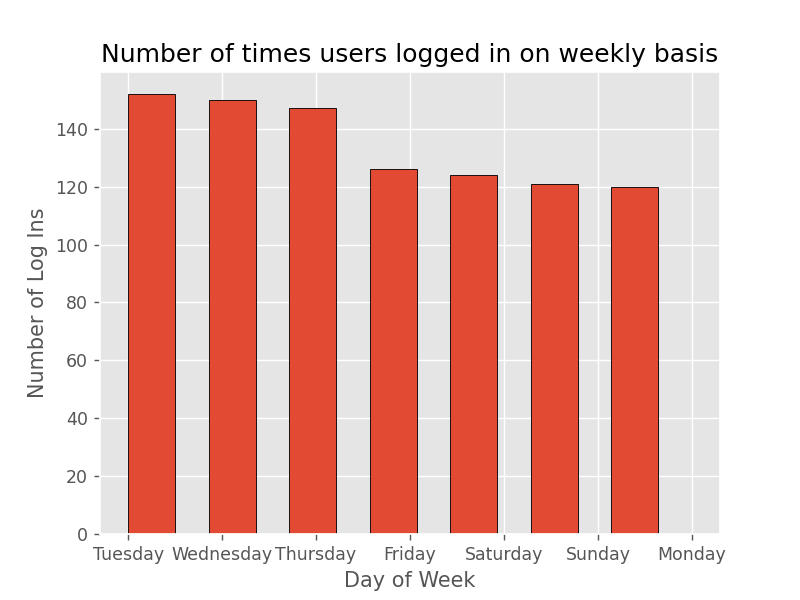

In [29]:
plt.style.use("ggplot")
plt.hist(daily_df.Day_of_Week, bins = 7, edgecolor = "black", width = 0.5)
plt.xlabel("Day of Week")
plt.ylabel("Number of Log Ins")
plt.title("Number of times users logged in on weekly basis")
plt.grid(True)
plt.show()

Analysis of Calories burnt with hours logged :-


<IPython.core.display.Javascript object>


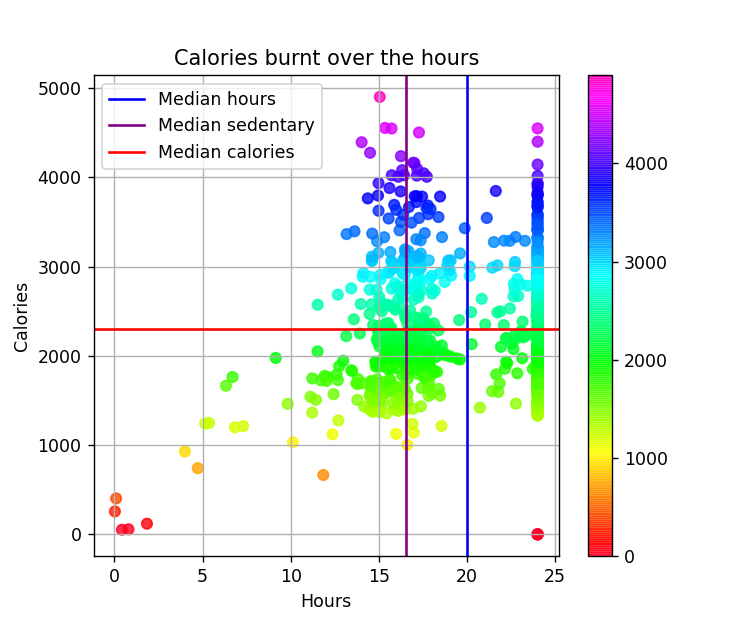

In [68]:
plt.style.use("default")
plt.figure(figsize=(6,5))
plt.scatter(daily_df.Total_Hours, daily_df.Calories, alpha=0.8, c=daily_df.Calories, cmap="gist_rainbow")
plt.xlabel("Hours")
plt.ylabel("Calories")
plt.title("Calories burnt over the hours")
median_calories = 2303
median_hours = 20
median_sedentary = 991/60
plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median hours")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median calories")
plt.legend()
plt.grid(True)
plt.show()

Analysis of Calories burnt with steps :-

<IPython.core.display.Javascript object>


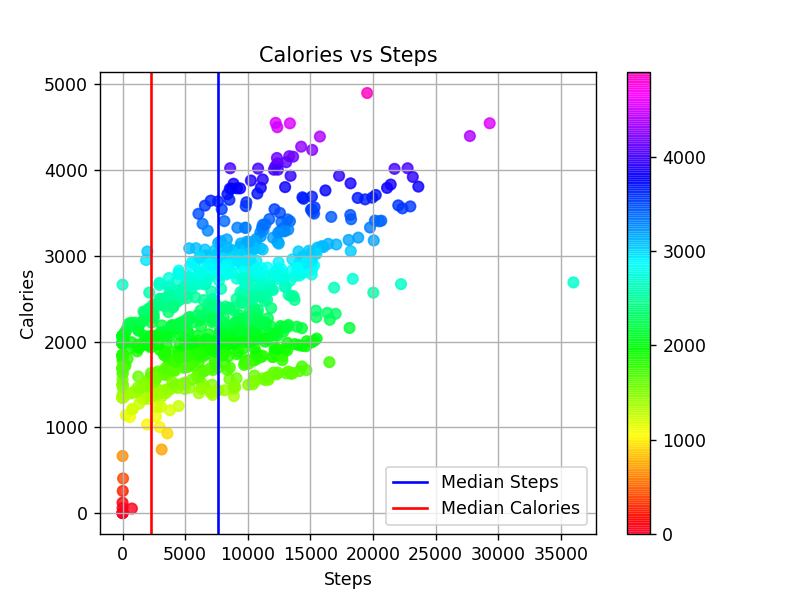

In [33]:
plt.scatter(daily_df.TotalSteps, daily_df.Calories, alpha=0.8,c = daily_df.Calories,cmap = "gist_rainbow")
plt.xlabel("Steps")
plt.ylabel("Calories")
plt.title("Calories vs Steps")
plt.colorbar(orientation = "vertical")
median_steps = 7637
median_calories = 2303

plt.axvline(median_steps, color = "Blue", label = "Median Steps")
plt.axvline(median_calories, color = "Red", label = "Median Calories")
plt.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


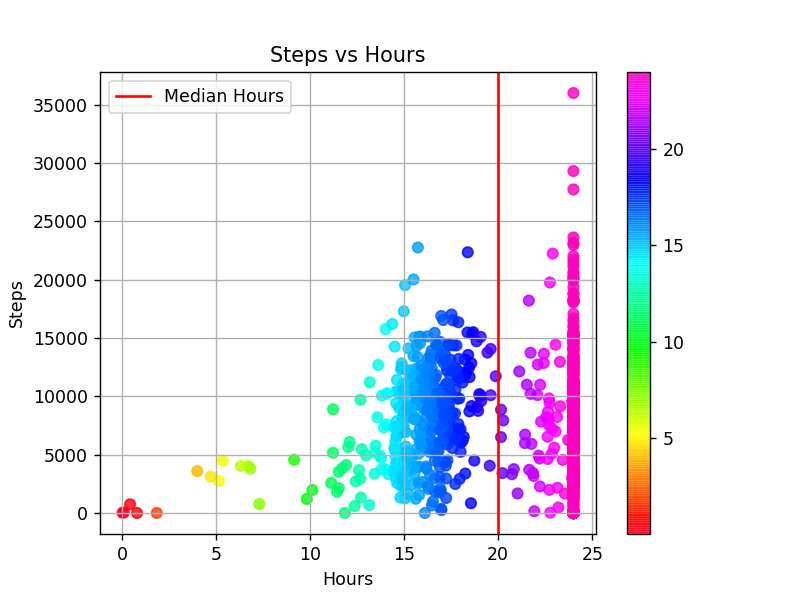

In [42]:
plt.scatter(daily_df.Total_Hours, daily_df.TotalSteps, alpha=0.8,c = daily_df.Total_Hours,cmap = "gist_rainbow")
plt.ylabel("Steps")
plt.xlabel("Hours")
plt.title("Steps vs Hours")
plt.colorbar(orientation = "vertical")
median_steps = 7637
median_hours = 20
plt.axvline(median_hours, color = "Red", label = "Median Hours")
plt.grid(True)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


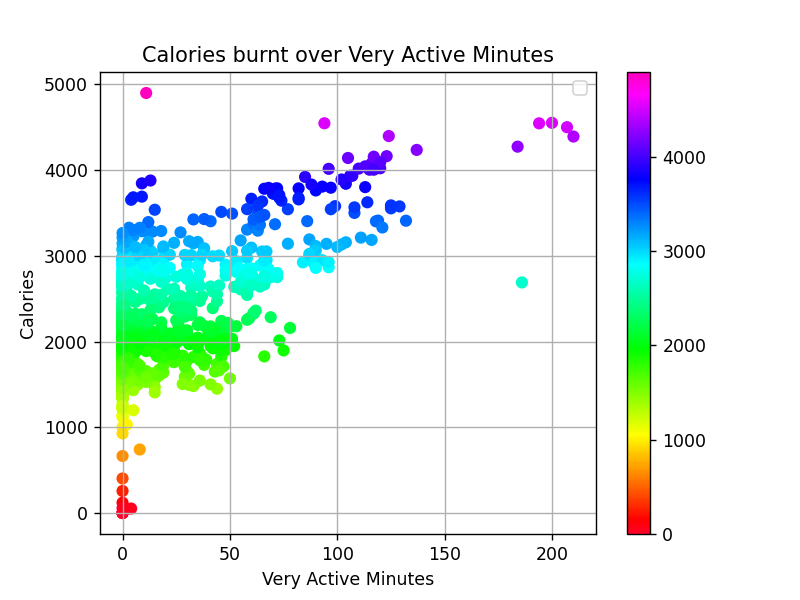

No handles with labels found to put in legend.


In [70]:
plt.scatter(daily_df.VeryActiveMinutes, daily_df.Calories, alpha=1, c= daily_df.Calories, cmap = "gist_rainbow")
plt.xlabel("Very Active Minutes")
plt.ylabel("Calories")
plt.title("Calories burnt over Very Active Minutes")
plt.colorbar(orientation = "vertical")
plt.legend()
plt.grid(True)
plt.show()

Share of Activity in minutes :-

<IPython.core.display.Javascript object>


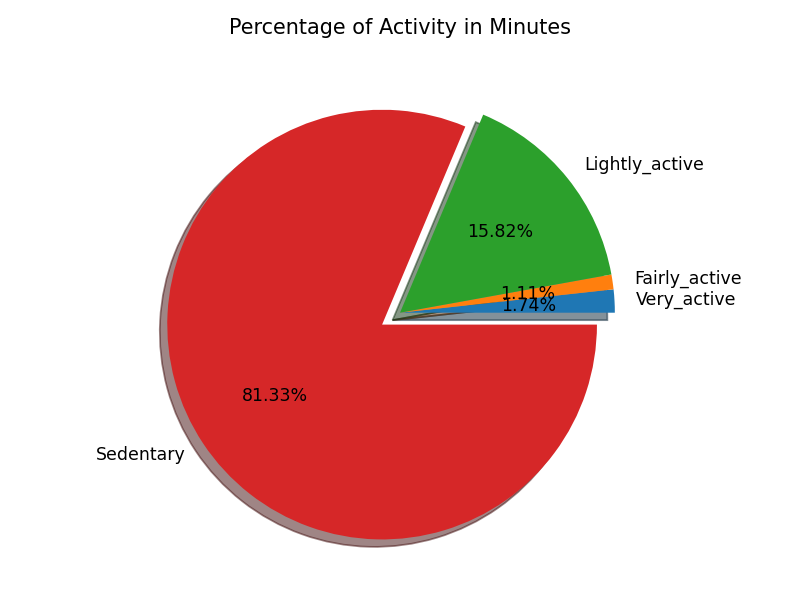

In [67]:
Very_active = daily_df["VeryActiveMinutes"].sum()
Fairly_active = daily_df["FairlyActiveMinutes"].sum()
Lightly_active = daily_df["LightlyActiveMinutes"].sum()
Sedentary = daily_df["SedentaryMinutes"].sum()
slices = [Very_active, Fairly_active, Lightly_active, Sedentary]
labels = ["Very_active", "Fairly_active", "Lightly_active", "Sedentary"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, explode = explode, shadow = True, autopct = "%0.2f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

### After our analysis we can now answer our business questions :-


<b>What are the trends identified?</b>
    <br>
    <br>
     1. Most of the users (81.3%) are Sedentary users. They are not using the app for tracking too much workout or their health activities.
    <br>
     2. People are tracking their activities on Weekdays just fine, but on the weekends a lot of them tend to ignore their health.
    <br>
     3. People are sleeping for an average of 419 minutes.

<b>How could these trends apply to Bellabeat customers?</b>
<br><br>
Both the companies target similar types of clients so a survey of the clients of Fitbit will be helpful to Bellabeat as well.

<b>How could these trends help influence Bellabeat marketing strategy?</b>
<br>
1. Bellabeat can encourage users to excercise more ofter so as to try and convert the huge 81% Sedentary Users market.
2. The users are sleeping for an average of 419 minutes. The users can be recommended a goal for optimal sleep and encourage them if they meet the goal.
3. As we can see from the above graph that the calories burnt increase with the increase in Active Minutes, thus the users can be given incentives for increasing their active minutes.
4. The users can be encouraged to excercise on weekends also as most of them do not track any activities on weekends